# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

from qcodes.instrument.parameter import Parameter

import matplotlib.pyplot as plt

from si_prefix import si_format as SI

In [4]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

### Database ini

In [5]:
SAMPLE = 'D055B1N4'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

# Import from origin

In [10]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


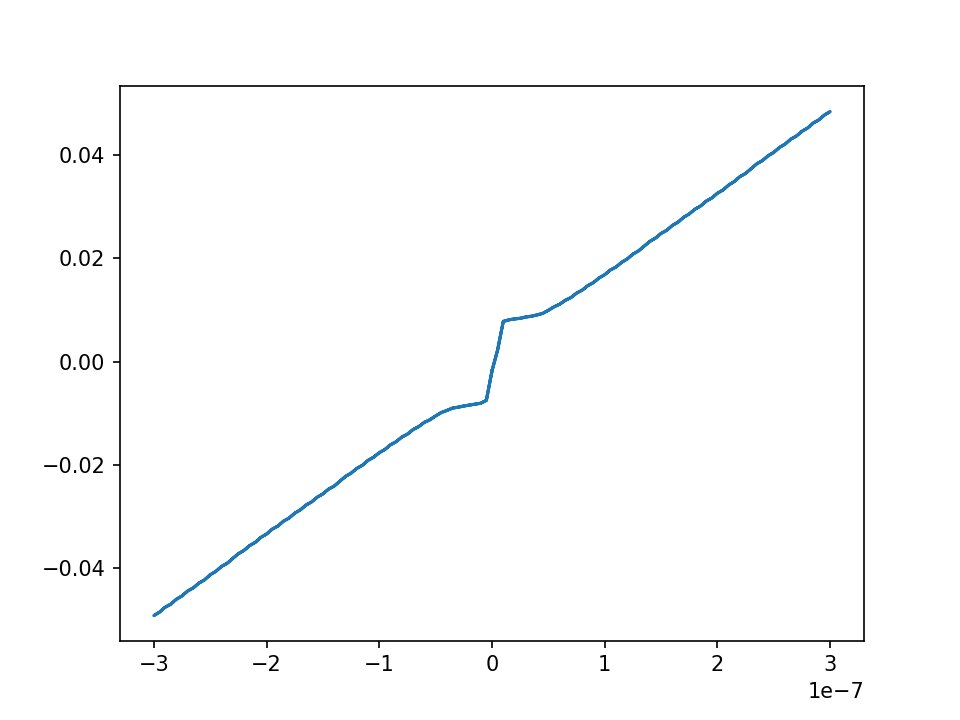

In [16]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [17]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC coarse')

Starting experimental run with id: 4


# Report

## Overview IVC

<IPython.core.display.Javascript object>


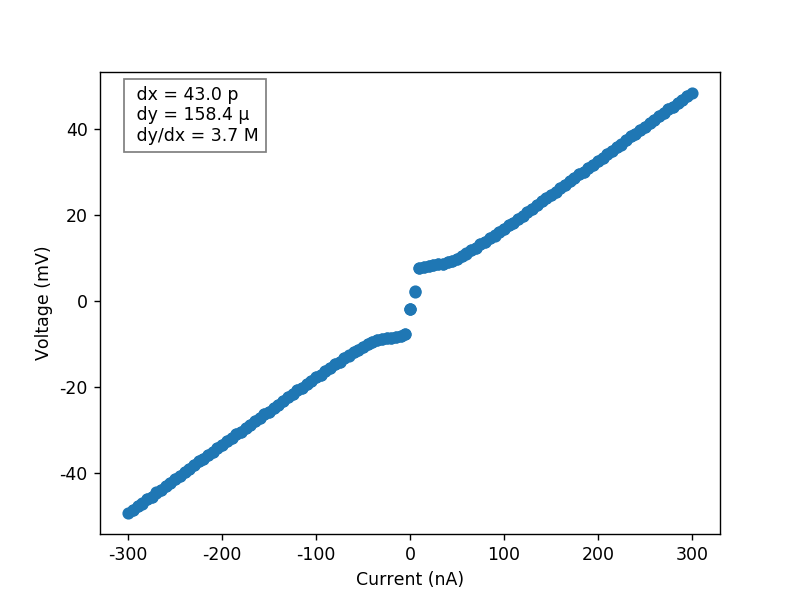

In [8]:
pbi(4, interactive = True)

In [10]:
7.7/.4

19.25

In [9]:
Vg = 7.7e-3
Rn_tot = 157.9e3
N = 20

## IVC fine scan

<IPython.core.display.Javascript object>


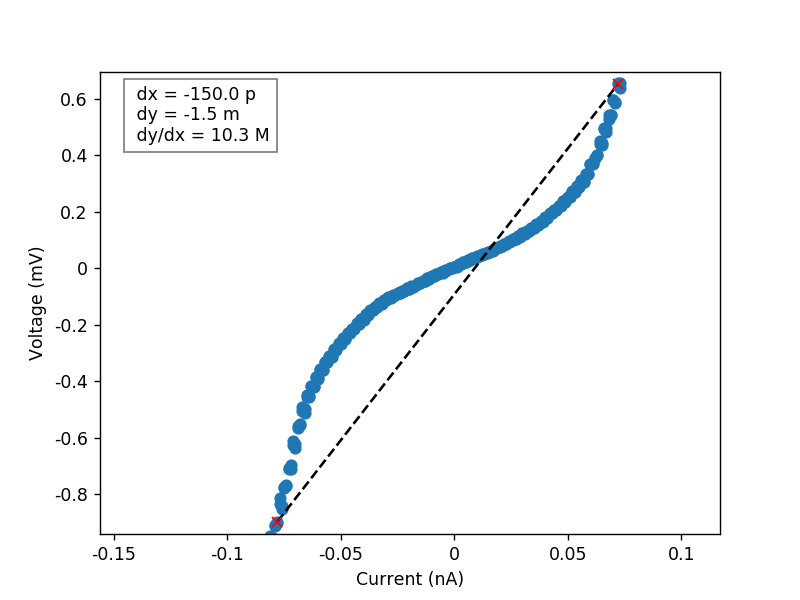

In [11]:
pbi(1, interactive = True)

In [12]:
Ro_tot = 3.588e6
Isw = 72e-12
N  = 20
Vo_tot = 450e-6

# Datatable update

In [13]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055B1N4,40.0f,185.9m,858.2m,36.0n,72.0p,20,2,7.9k,157.9k,179.4k,NaN,3.6M,450.0u,Fin,measd_lv,1.1


In [14]:
ft.to_excel("..\chain table.xlsx")
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055B1N4,40.0f,185.9m,858.2m,36.0n,72.0p,20,2,7.9k,157.9k,179.4k,NaN,3.6M,450.0u,Fin,measd_lv,1.1
